# Hello World: Kaggle Edition ([aka, the Titanic Competition](https://www.kaggle.com/c/titanic))

*Robert A. Brown*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib  import cm
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

train_path = 'data/train.csv'
test_path = 'data/test.csv'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv(train_path)
train.Embarked[train.Embarked.isnull()]  = 'M'

catagorical = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numeric = [c for c in list(train) if c not in catagorical]
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


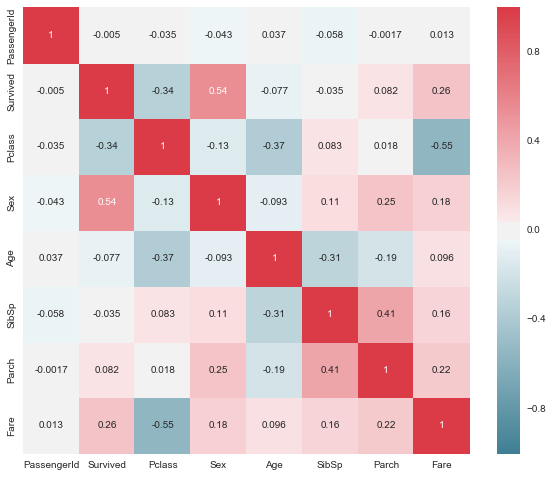

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
heat = sns.heatmap(train.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                   square=False, annot = True, ax=ax)

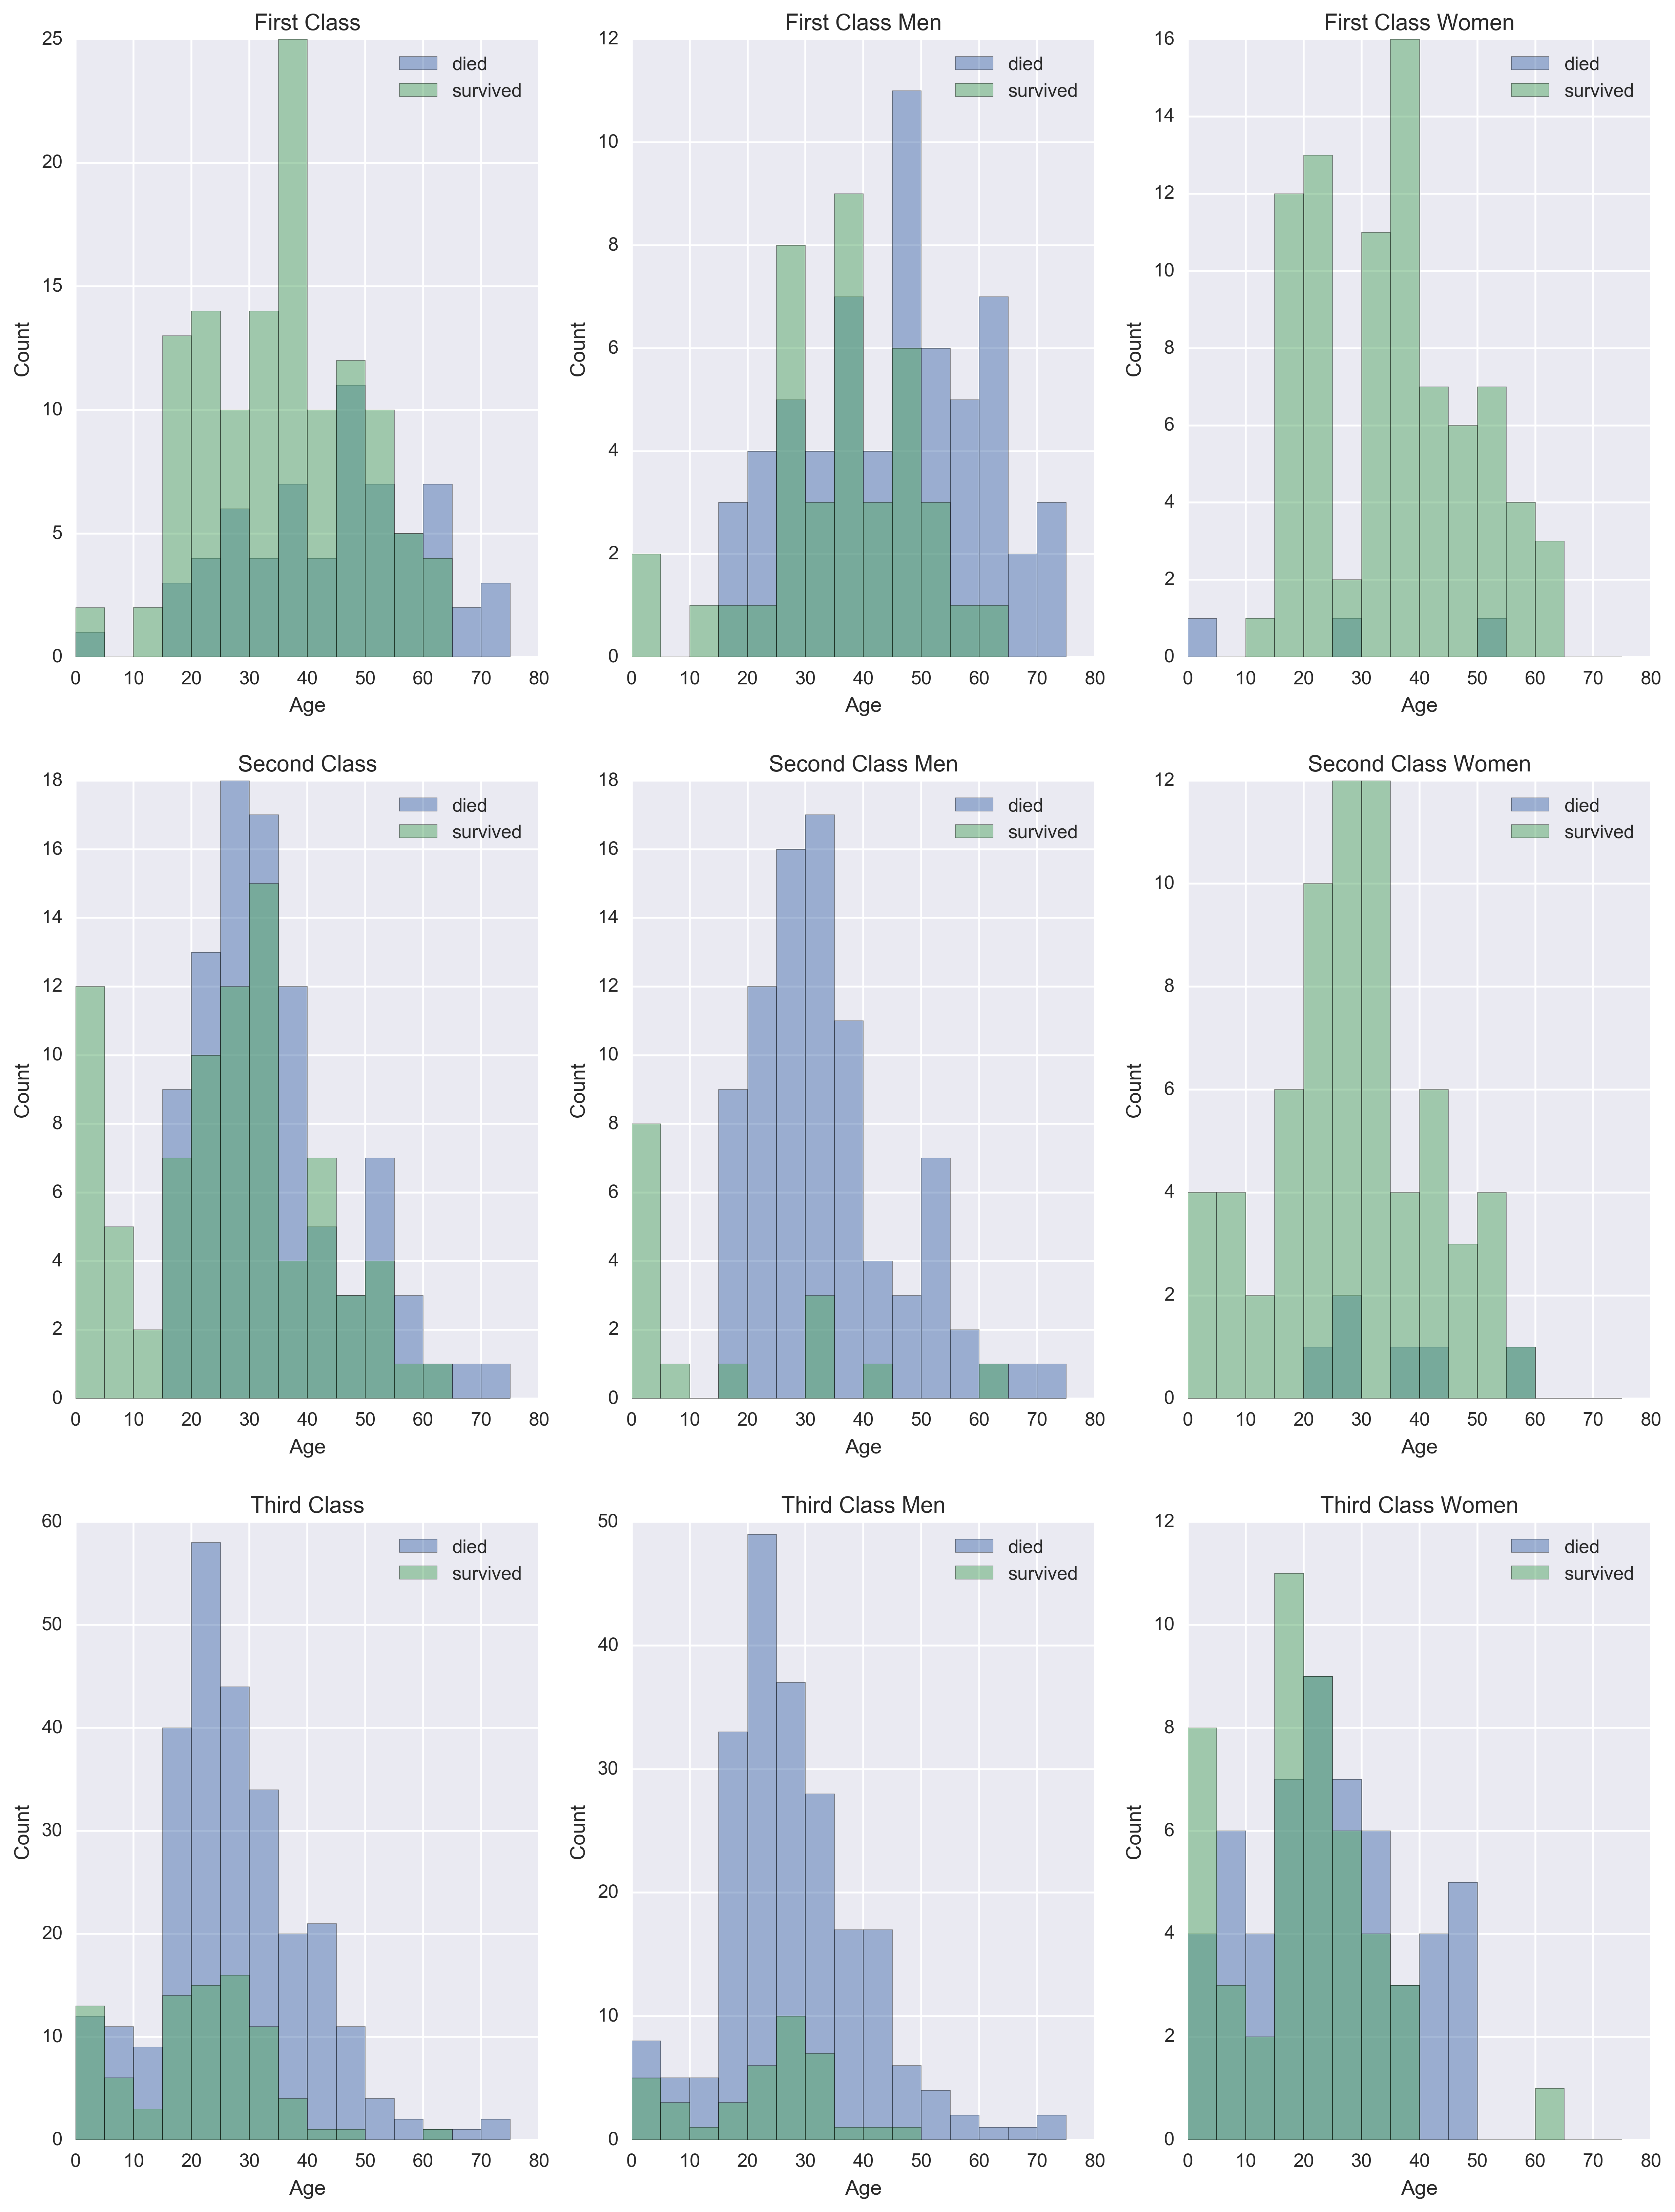

In [5]:
not_nan = np.isfinite(train.Age)
classes = [train[(train.Pclass == c) & not_nan] for c in sorted(train.Pclass.unique())]

bins = np.arange(0, 80, 5)
title = ['First Class', 'Second Class', 'Third Class']

rows = cols = 3
fig, ax = plt.subplots(num=None, figsize=(15, 20), dpi=400, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(rows, cols)
ax = [plt.subplot(gs[i]) for i in range(rows*cols)]

for i, CLASS in enumerate(classes):
    survived = CLASS[CLASS.Survived == 1]
    died = CLASS[CLASS.Survived == 0]
    
    ax[3*i].hist(died.Age, alpha=0.5, bins=bins, label='died')
    ax[3*i].hist(survived.Age, alpha=0.5, bins=bins, label='survived')
    ax[3*i].set_title(title[i])
    ax[3*i].set_ylabel('Count')
    ax[3*i].set_xlabel('Age')
    ax[3*i].legend(loc='upper right')    
    
    for k, df in {'survived':survived, 'died':died}.items():
        male_df = df[df.Sex == 'male']
        female_df = df[df.Sex == 'female']        
        ax[3*i + 1].hist(male_df.Age, alpha=0.5, bins=bins, label=k)
        ax[3*i + 2].hist(female_df.Age, alpha=0.5, bins=bins, label=k)
        
        for j, s in enumerate(['Men', 'Women']):
            ax[3*i+j+1].set_title('{0} {1}'.format(title[i], s))
            ax[3*i+j+1].set_ylabel('Count')
            ax[3*i+j+1].set_xlabel('Age')
            ax[3*i+j+1].legend(loc='upper right')    

In [41]:
features = ['Age', 'Pclass', 'Fare', 'Sex', 'SibSp', 'Parch']
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train.Sex = train.Sex.apply(lambda x: 1 if x == 'female' else 0)
test.Sex = test.Sex.apply(lambda x: 1 if x == 'female' else 0)

X_train, y_train = train[features], train.Survived

In [47]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}
bst = XGBClassifier(**params).fit(X_train, y_train)

In [48]:
test['Survived'] = bst.predict(test[features])
test[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)